In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print(pd.__version__)
!python --version
print(tf.__version__)

2.2.2
Python 3.11.13
2.18.0


In [2]:
handwritten_imageset = keras.datasets.mnist.load_data(path="mnist.npz")
mnist = fetch_openml('mnist_784', version=1, parser='auto')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = handwritten_imageset
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu), #128 neuronios na camada escondida (aprender o padrão dos pixels...)
    keras.layers.Dense(10, activation=tf.nn.softmax) #funções de ativação
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8337 - loss: 7.4618
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9063 - loss: 0.4220
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9240 - loss: 0.3013
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9365 - loss: 0.2509
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9438 - loss: 0.2257


In [8]:
results = model.evaluate(x_test, y_test,verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9397 - loss: 0.2626


In [9]:
#dict(zip(model.metrics_names, results))
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [10]:
predictions[0]

array([3.37558999e-33, 5.09508423e-16, 2.42216715e-11, 5.52128482e-11,
       2.25760828e-19, 4.76337643e-19, 0.00000000e+00, 9.99999940e-01,
       2.60447707e-14, 1.02201796e-13], dtype=float32)

In [11]:
import numpy as np
np.argmax(predictions[0])

np.int64(7)

In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

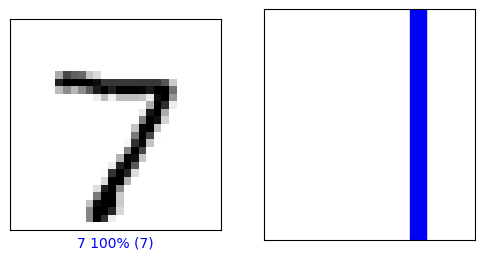

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

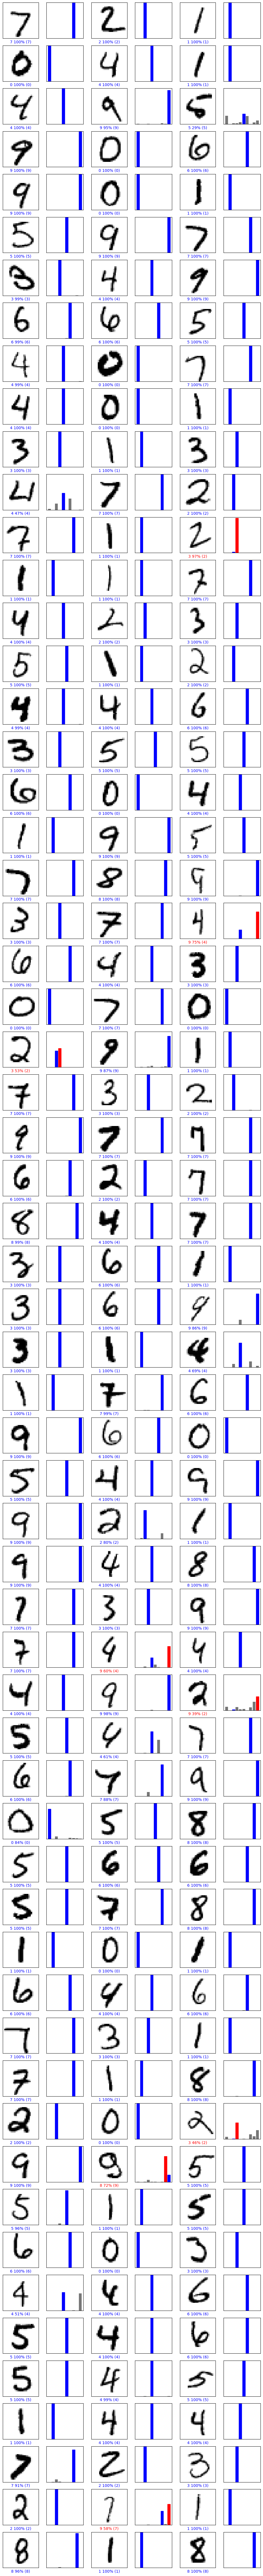

In [14]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 60
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [16]:

# Grab an image from the test dataset.
img = x_test[0]

print(img.shape)

(28, 28)


In [17]:
#Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez.
#De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:


# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [18]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[3.37561607e-33 5.09512341e-16 2.42218589e-11 5.52131674e-11
  2.25762586e-19 4.76339504e-19 0.00000000e+00 1.00000000e+00
  2.60449231e-14 1.02202386e-13]]


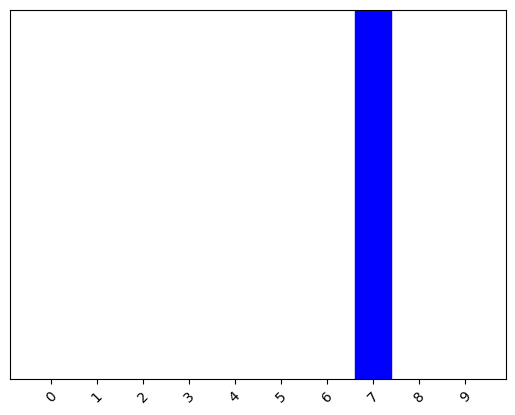

In [19]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)


In [21]:
model.save('mnist_nn_model.h5')
print("Modelo salvo em 'mnist_nn_model.keras'")

Modelo salvo em 'mnist_nn_model.keras'
